# Name - Harsh Maurya
# TSF_TASK_2
# Predict the optimum number of clusters and represent it visually.
# Iris dataset

In [1]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop('Id',axis=1)

In [4]:
X = df.iloc[:,0:4]
X


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


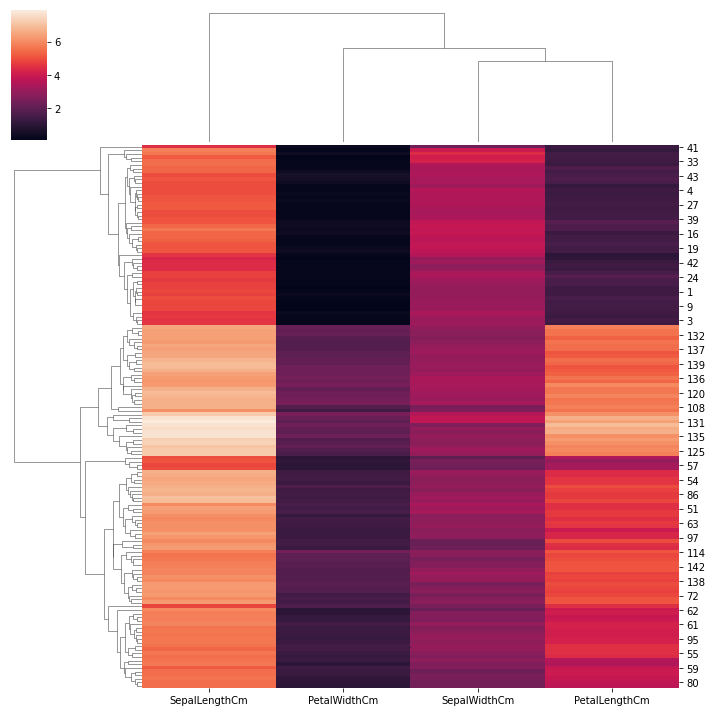

In [5]:
sns.clustermap(X)

<Figure size 720x720 with 0 Axes>

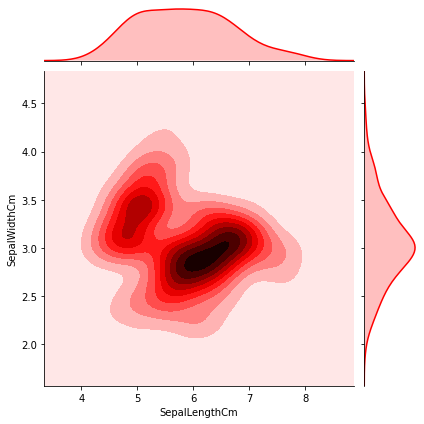

In [6]:
plt.figure(figsize=(10,10))
sns.jointplot(X['SepalLengthCm'],X['SepalWidthCm'],kind='kde',color='red')

<Figure size 720x720 with 0 Axes>

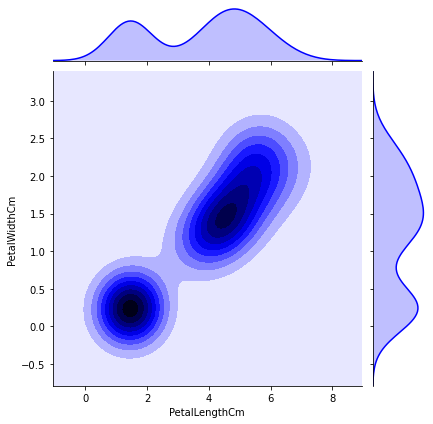

In [7]:
plt.figure(figsize=(10,10))
sns.jointplot(X['PetalLengthCm'],X['PetalWidthCm'],kind='kde',color='blue')

# Histogram Plot

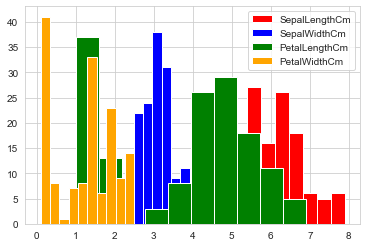

In [8]:
sns.set_style('whitegrid')
plt.hist(df['SepalLengthCm'],histtype='bar',label='SepalLengthCm',color='red')
plt.hist(df['SepalWidthCm'],label='SepalWidthCm',color='blue')
plt.hist(df['PetalLengthCm'],label='PetalLengthCm',color='green')
plt.hist(df['PetalWidthCm'],label='PetalWidthCm',color='orange')
plt.legend()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B855CE9A60>,
      dtype=object)

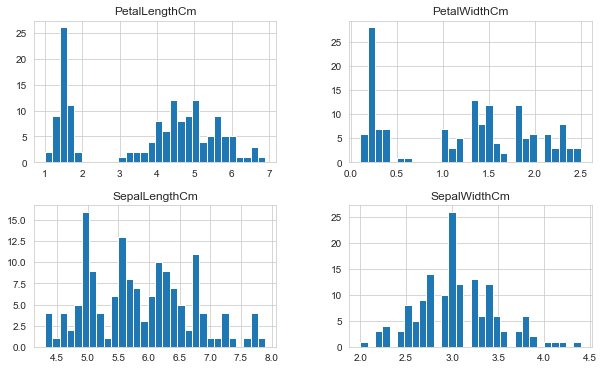

In [9]:
X.hist(bins=30,figsize=(10,6))

In [10]:
from sklearn.cluster import KMeans

# within-cluster sum of squares

In [11]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [12]:
wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.930963049671746,
 34.46400663145227,
 30.001881875582672,
 27.839591136933254,
 26.4169515288633]

# Elbow Method

Text(0, 0.5, 'WCSS')

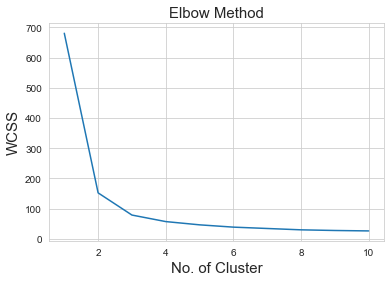

In [13]:
clusters = range(1,11)
plt.plot(clusters,wcss)
plt.title('Elbow Method',fontsize=15)
plt.xlabel('No. of Cluster',fontsize=15)
plt.ylabel('WCSS',fontsize=15)

# KMeans Cluster

In [14]:
kmeans = KMeans(3)

In [15]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [16]:
predict = kmeans.fit_predict(X)
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [17]:
X['cluster'] = predict
X


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


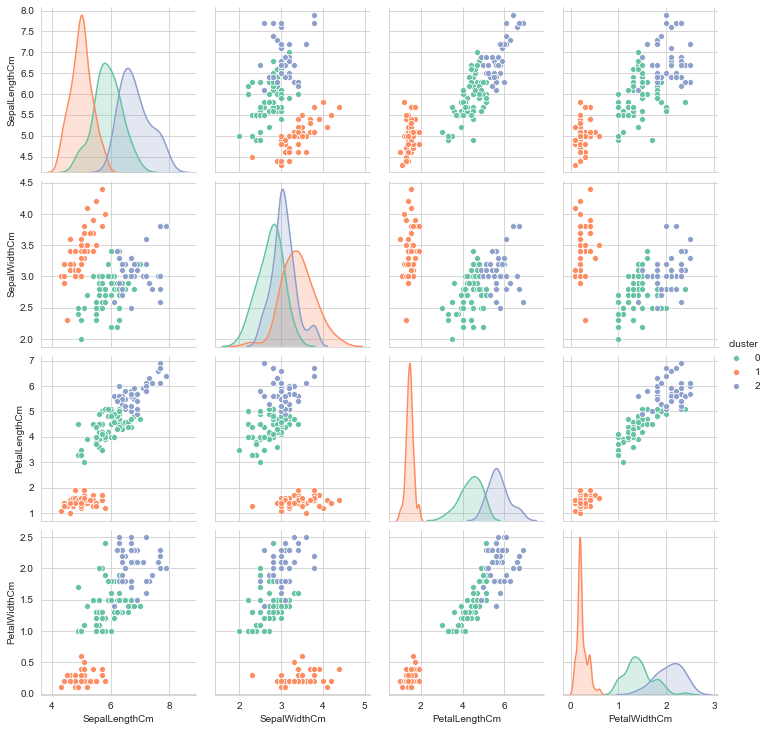

In [18]:
sns.pairplot(X,hue='cluster',palette='Set2')

# Clusters Centers

In [19]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# Visualization


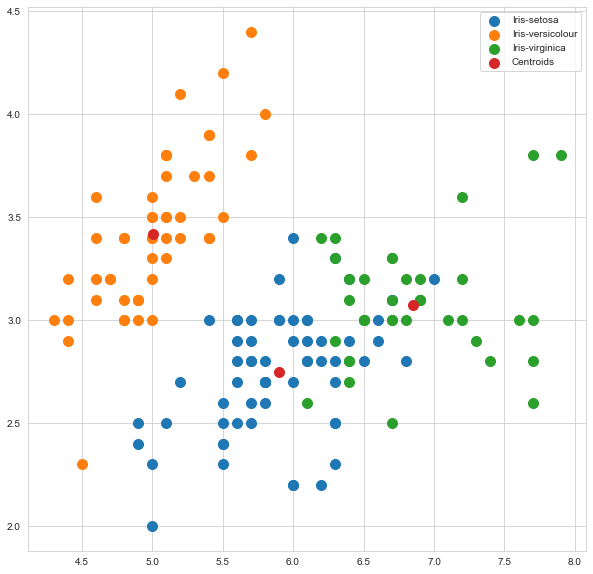

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(X[X['cluster']==0]['SepalLengthCm'], X[X['cluster']==0]['SepalWidthCm'],label = 'Iris-setosa',s=100)
plt.scatter(X[X['cluster']==1]['SepalLengthCm'], X[X['cluster']==1]['SepalWidthCm'], label = 'Iris-versicolour',s=100)
plt.scatter(X[X['cluster']==2]['SepalLengthCm'], X[X['cluster']==2]['SepalWidthCm'], label = 'Iris-virginica',s=100)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], label = 'Centroids',s=100)
plt.legend()
